In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from scipy.linalg import eig

In [3]:
class KernelLPP(object):
    def __init__(self,  num_eigen, k = 10):
        self.num_eigen = num_eigen #抽出する固有ベクトルの数
        self.k = k #近傍グラフの行毎の非ゼロ要素数
        
    def _neighbor_graph(self, X):
        samples = X.shape[0]
        self.W = np.zeros((samples, samples))
        for i in range(samples):
            norms = np.linalg.norm(X-X[i], axis = 1)
            k_neighbor = np.argsort(norms)[:self.k]
            self.W[i, k_neighbor] = 1
            self.W[k_neighbor, i] = 1
        self.D = np.diag(np.sum(self.W, axis = 0))
        self.L = self.D - self.W
        return self.W, self.D, self.L
        
    def fit_transform(self, X):
        W, D, L = self._neighbor_graph(X)
        #ラプラス固有写像問題をとく
        #la, v = eig(L, D)
        tmp = np.dot(np.linalg.inv(D), L)
        la, v = np.linalg.eig(tmp)
        #固有値の一つは0なので除外する。小さい固有値に対応するベクトルをnum_eigen個取り出す
        smallest_la = np.argsort(la)[1:self.num_eigen+1]
        self.T = v[:, smallest_la]
        return self.T

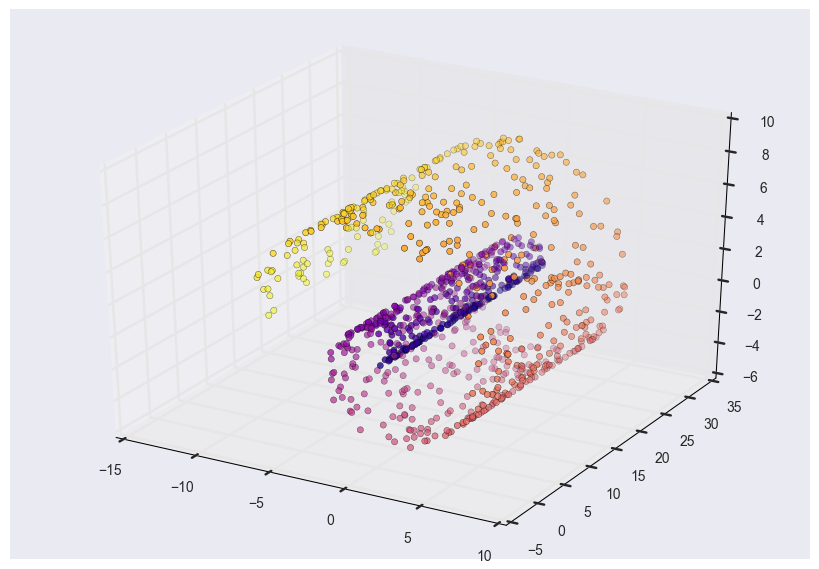

In [4]:
n = 1000
a = 3 * np.pi * np.random.rand(n)
X = np.zeros((n, 3))
X[:, 0] = a * np.cos(a)
X[:, 1] = 30 * np.random.rand(n)
X[:, 2] = a * np.sin(a)

from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c = a, cmap = "plasma")

In [5]:
lpp = KernelLPP(2, k = 20)
trans = lpp.fit_transform(X)

/Users/nakahara/.pyenv/versions/anaconda2-4.2.0/lib/python2.7/site-packages/numpy/core/numeric.py:533: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order, subok=True)


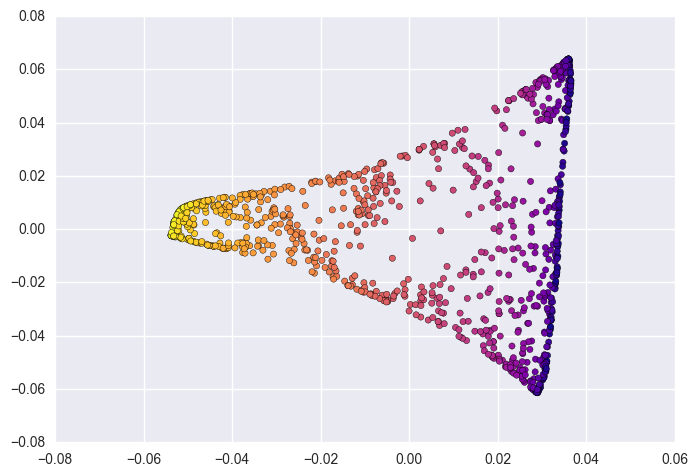

In [6]:
plt.scatter(trans[:,0], trans[:,1], c = a, cmap = "plasma")